## DATA PREPROCESSING

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

import lightgbm as lgb

from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans

In [2]:
# Load csv file
df=pd.read_csv("online_shoppers.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### Basic inspection on data

In [3]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [4]:
print(df.drop_duplicates())

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
print(df.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


### Encoding categorical columns with Label Encoder

In [7]:
label_encode =LabelEncoder()
df["Month"] = label_encode.fit_transform(df["Month"])
df["VisitorType"]= label_encode.fit_transform(df["VisitorType"])

In [8]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,False,False


In [9]:
# encoding boolean values
df["Weekend"]=df["Weekend"].astype(int)
df["Revenue"] =df["Revenue"].astype(int)

In [10]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0


### Feature scaling for numerical columns

In [11]:
numeric_cols = ["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated",
                "ProductRelated_Duration","BounceRates","ExitRates","PageValues","SpecialDay"]
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,1,1,1,1,2,0,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,2,2,2,1,2,2,0,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,4,1,9,3,2,0,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,2,3,2,2,4,2,0,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,2,3,3,1,4,2,1,0


### Splitting features and target

In [12]:
X=df.drop("Revenue",axis=1) #features
y=df["Revenue"] #target variable

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, y_train

(       Administrative  Administrative_Duration  Informational  \
 8077        -0.696993                -0.457191      -0.396478   
 1568        -0.696993                -0.457191      -0.396478   
 462         -0.696993                -0.457191       0.390859   
 743         -0.696993                -0.457191      -0.396478   
 222         -0.696993                -0.457191      -0.396478   
 ...               ...                      ...            ...   
 11964        3.517781                 5.231541      -0.396478   
 5191        -0.696993                -0.457191      -0.396478   
 5390        -0.696993                -0.457191      -0.396478   
 860         -0.696993                -0.457191      -0.396478   
 7270         1.410394                 0.324324      -0.396478   
 
        Informational_Duration  ProductRelated  ProductRelated_Duration  \
 8077                -0.244931       -0.601062                -0.581975   
 1568                -0.244931       -0.646033          

## Visualization

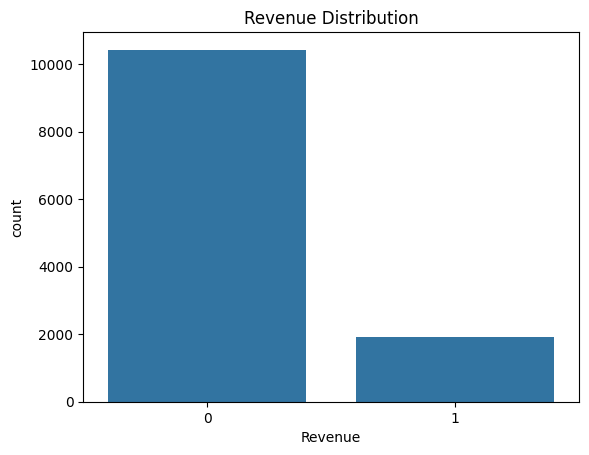

In [24]:
#visualization of Revenue distribution
sns.countplot(x='Revenue', data=df)
plt.title("Revenue Distribution")
plt.show()

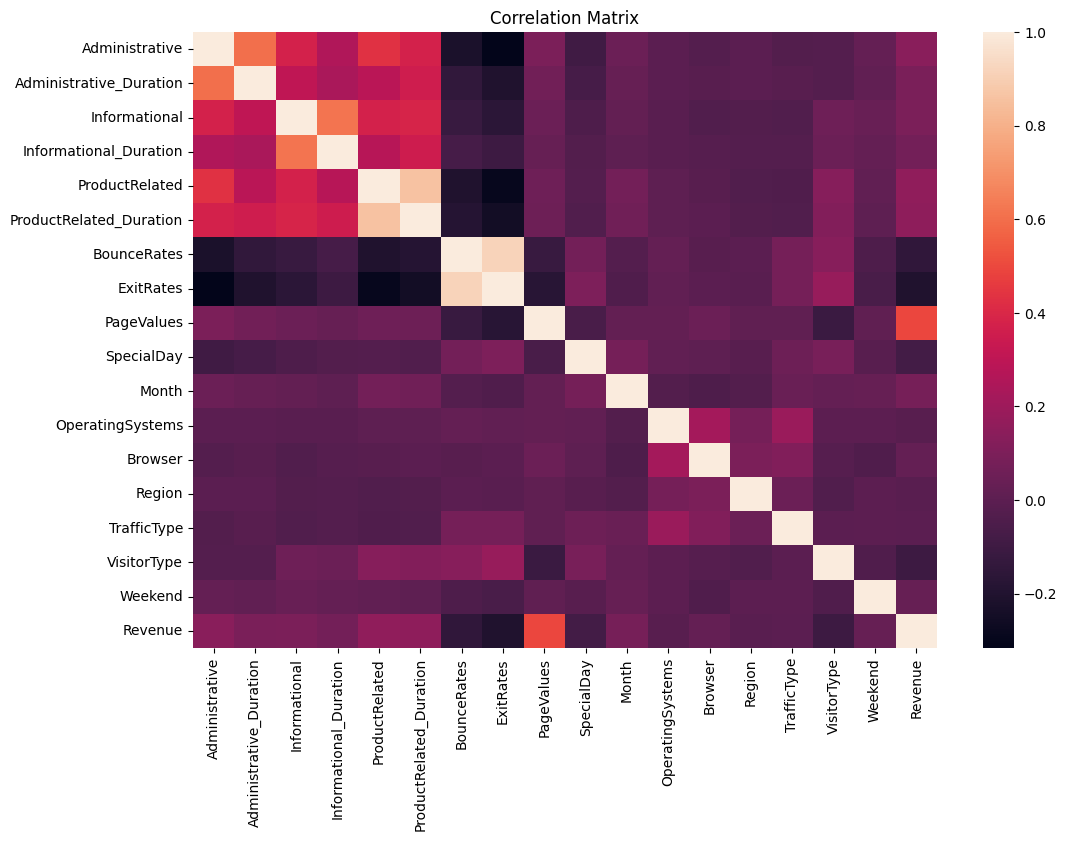

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr())
plt.title("Correlation Matrix")
plt.show()

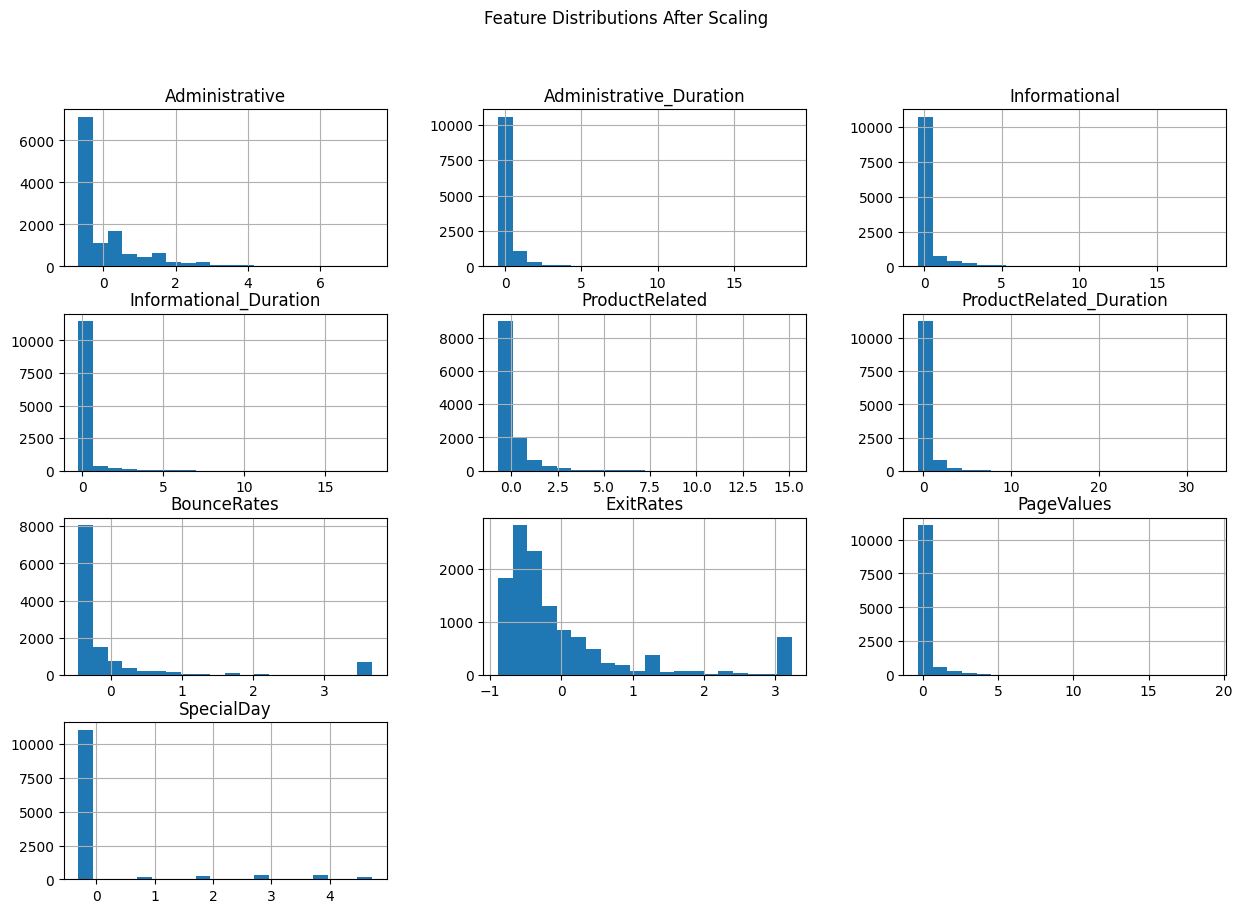

In [26]:
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions After Scaling")
plt.show()

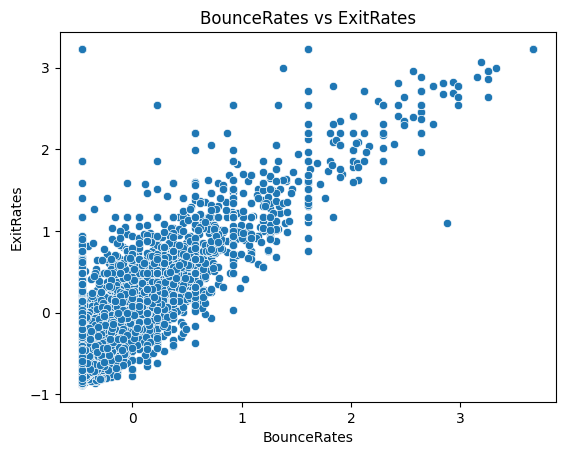

In [27]:
#scatter plot 
sns.scatterplot(x='BounceRates', y='ExitRates', data=df)
plt.title("BounceRates vs ExitRates")
plt.show()

## Supervised learning 

### Logistic Regression

In [14]:

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8805082454717491
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3124
           1       0.75      0.35      0.48       575

    accuracy                           0.88      3699
   macro avg       0.82      0.66      0.70      3699
weighted avg       0.87      0.88      0.86      3699



### Decision Tree Classifier

In [15]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8556366585563666
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3124
           1       0.53      0.56      0.55       575

    accuracy                           0.86      3699
   macro avg       0.73      0.74      0.73      3699
weighted avg       0.86      0.86      0.86      3699



### Random Forest Classifier

In [30]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8969991889699919
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3124
           1       0.72      0.55      0.62       575

    accuracy                           0.90      3699
   macro avg       0.82      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699



### KNN Classifier

In [31]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8694241686942417
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3124
           1       0.66      0.33      0.44       575

    accuracy                           0.87      3699
   macro avg       0.77      0.65      0.68      3699
weighted avg       0.85      0.87      0.85      3699



### Gradient boosting classifier

In [32]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8972695323060287
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3124
           1       0.70      0.59      0.64       575

    accuracy                           0.90      3699
   macro avg       0.81      0.77      0.79      3699
weighted avg       0.89      0.90      0.89      3699



### Lightgbm

In [33]:

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 1333, number of negative: 7298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1892
[LightGBM] [Info] Number of data points in the train set: 8631, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.154443 -> initscore=-1.700168
[LightGBM] [Info] Start training from score -1.700168
LightGBM Accuracy: 0.8980805623141389
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3124
           1       0.70      0.59      0.64       575

    accuracy                           0.90      3699
   macro avg       0.82      0.77      0.79      3699
weighted avg       0.89      0.90      0.89      3699



### Results

In [38]:
# Collect Results
final_results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "KNN": accuracy_score(y_test, y_pred_knn),
    
   
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb),
    
    "LightGBM": accuracy_score(y_test, y_pred_lgb),
  
}

# Create DataFrame
results_df = pd.DataFrame(list(final_results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print(results_df)


                 Model  Accuracy
0             LightGBM  0.898081
1    Gradient Boosting  0.897270
2        Random Forest  0.896999
3  Logistic Regression  0.880508
4                  KNN  0.869424
5        Decision Tree  0.855637


## Visualization of model comparison

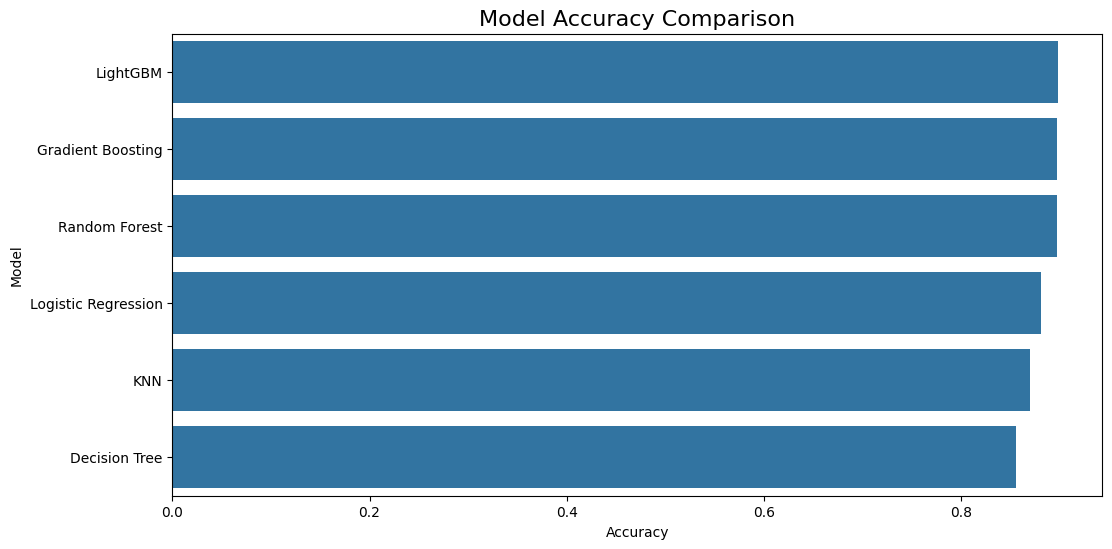

In [39]:
# Visualize the model comparison
plt.figure(figsize=(12,6))
sns.barplot(x='Accuracy', y='Model', data=results_df)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()


## Unsupervised learning

### K - means clustering

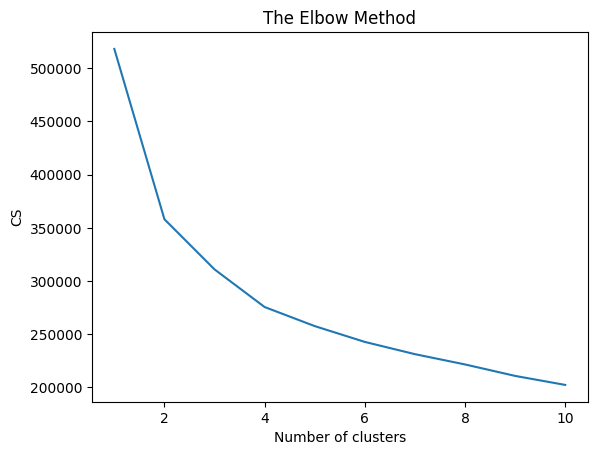

In [36]:
# finding the number of clusters using Elbow Method
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


In [37]:
kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 8987 out of 12330 samples were correctly labeled.
Accuracy score: 0.73


### Conclusion
##### In this project, we explored the Online Shoppers Purchasing Intention Dataset using both classification and clustering approaches to gain insights into user behavior and purchasing tendencies.

### Classification:
##### We applied multiple machine learning algorithms to predict whether a user would complete a purchase during their session. The models and their accuracies were as follows:

#### LightGBM: 0.8981

#### Gradient Boosting: 0.8972

#### Random Forest Classifier: 0.8967

#### Logistic Regression: 0.8805

#### K-Nearest Neighbors (KNN): 0.8694

#### Decision Tree: 0.8556

##### Among these, LightGBM and Random Forest achieved the highest accuracy (≈ 89.81%), making them the most effective models for this classification task.

### Clustering:
##### We also applied K-Means Clustering to segment the sessions into user behavior groups. The clustering quality was evaluated using the Silhouette Score, which was 0.73, indicating a meaningful and well-separated clustering structure.